## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

In [1]:
import pandas as pd

---

## Step 2: Obtain the data.

#### 1. Read in the data.

In [2]:
df = pd.read_csv("chronic_kidney_disease_full.csv")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

#### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer:
After doing some google search related to the features and current analysis we select the following features:

1. **Age (age):** Older individuals might have a higher risk of developing CKD.

2. **Blood Pressure (bp):** High blood pressure (hypertension) may increase risk of CKD.

3. **Specific Gravity (sg):** issuees in urine specific gravity can be a sign of kidney dysfunction.

4. **Albumin (al) and Sugar (su):** high levels can indicate kidney damage.

5. **Red Blood Cells (rbc) and Pus Cell (pc):** These may be a sign of kidney disease or urinary tract infections.

6. **Blood Glucose Random (bgr) and Blood Urea (bu):** high levels can be a sign of kidney dysfunction.

7. **Hemoglobin (hemo) and Packed Cell Volume (pcv):** Low levels may be a sign of CKD related complications.

8. **Hypertension (htn) and Diabetes Mellitus (dm):** they can be both major risk elements contributing to CKD.

9. **Coronary Artery Disease (cad):** this can an element contributing to CKD.

10. **Appetite (appet), Pedal Edema (pe), and Anemia (ane):** These may be signs of advanced CKD.


---

## Step 3: Explore the data.

#### 3. How much of the data is missing from each column?

In [4]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [5]:
proportion_missing = df.isnull().sum()/len(df) * 100
print("Propotion missing values for each column (%):")
proportion_missing

Propotion missing values for each column (%):


age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wbcc     26.50
rbcc     32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
class     0.00
dtype: float64

#### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

Answer:
Two downsides of dropping rows with missing values are:

* When rows with missing values are removed, important patterns present in the data may be lost.
* Dropping rows with missing values reduces the amount of records in the dataset, and this may result to biased conclusions.

#### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer:
* Patient may report to the doctors/nurses information that is inaccurate.
* Data entry errors by the doctors/nurses.
* Errors during measurements example for blood pressure.

---

## Step 4: Model the data.

#### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

Answer:

A simple model will be to classify everyone as having "CKD", this prevents from having false negatives(no missed CKD cases), but may leads to high false positives.

#### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer:

In problem 6, we minimize false negatives to make sure that no person with CKD is classified incorrectly as not having CKD so that we never miss a case of CKD.

#### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer:

This simple model from problem 6 may leads to high false positives. Many healthy people would be incorrectly classified as having CKD, leading to unnecessary testing and anxiety, and possibly causing them other health issues.

#### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer:

A simple model will be to classify everyone as not having "CKD", this prevents from having high false positives, but may leads to false negatives(no missed CKD cases).

#### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer:

In problem 9, we minimize false positives to make sure that persons without CKD are not classified incorrectly as having CKD.

#### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer:

This simple model from problem 9 may leads to high false negatives. Many sick people with CKD would be incorrectly classified as not having CKD.

#### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

Remember to do a train/test split. We suggest using GridSearchCV and pipelines.

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [7]:
df = df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']]
df.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,121.0,36.0,1.2,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,NaN,18.0,0.8,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,423.0,53.0,1.8,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,117.0,56.0,3.8,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,106.0,26.0,1.4,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   bgr     356 non-null    float64
 8   bu      381 non-null    float64
 9   sc      383 non-null    float64
 10  sod     313 non-null    float64
 11  pot     312 non-null    float64
 12  hemo    348 non-null    float64
 13  pcv     329 non-null    float64
 14  wbcc    294 non-null    float64
 15  rbcc    269 non-null    float64
 16  htn     398 non-null    object 
 17  dm      398 non-null    object 
 18  cad     398 non-null    object 
 19  appet   399 non-null    object 
 20  pe      399 non-null    object 
 21  ane     399 non-null    object 
 22  cl

In [9]:
df.isnull().sum()/len(df)*100

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wbcc     26.50
rbcc     32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
class     0.00
dtype: float64

Each column has missing values

In [10]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [11]:
missing_proportion = df.isnull().sum() / len(df) * 100
# filter features with proportion > 15% 
features_to_drop = missing_proportion[missing_proportion > 15].index
df = df.drop(columns=features_to_drop) # drop features with proportion > 15%

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     356 non-null    float64
 6   bu      381 non-null    float64
 7   sc      383 non-null    float64
 8   hemo    348 non-null    float64
 9   htn     398 non-null    object 
 10  dm      398 non-null    object 
 11  cad     398 non-null    object 
 12  appet   399 non-null    object 
 13  pe      399 non-null    object 
 14  ane     399 non-null    object 
 15  class   400 non-null    object 
dtypes: float64(9), object(7)
memory usage: 50.1+ KB


In [13]:
numeric_columns = df.select_dtypes(include='number').columns
imputer = KNNImputer(n_neighbors=5, weights="distance")
df[numeric_columns] = imputer.fit_transform(df[numeric_columns]) # impute missing values only in numeric columns

In [14]:
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    most_frequent = df[column].mode()[0]  
    df[column] = df[column].fillna(most_frequent) # impute categorical data with most frequent value for each column or mode

In [15]:
df.isnull().sum() # no missing values

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
hemo     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [16]:
# values of categorical features
for column in df.columns:
    if df[column].dtype == 'O': 
        print(df[column].value_counts())
        print("==========================")

htn
no     253
yes    147
Name: count, dtype: int64
dm
no     263
yes    137
Name: count, dtype: int64
cad
no     366
yes     34
Name: count, dtype: int64
appet
good    318
poor     82
Name: count, dtype: int64
pe
no     324
yes     76
Name: count, dtype: int64
ane
no     340
yes     60
Name: count, dtype: int64
class
ckd       250
notckd    150
Name: count, dtype: int64


In [17]:
df['class'] = df['class'].map({'ckd':1, 'notckd':0})

In [18]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,15.4,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,114.429491,18.0,0.8,11.3,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,9.6,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,11.2,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,11.6,no,no,no,good,no,no,1


In [19]:
X = df.drop(columns='class')
y = df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=22, stratify=y)

In [21]:
categorical_columns # 'class' needs to be removed from categorical columns for preprocessing in the pipeline

Index(['htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'], dtype='object')

In [22]:
categorical_columns = categorical_columns[:-1]

In [23]:
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder=StandardScaler()
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

In [24]:
params = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100], 'logreg__penalty': ['l2']}
logreg_grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         Index(['htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object'))])),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l2']},
             scoring='accuracy')

In [25]:
print("Best parameters:")
logreg_grid.best_params_

Best parameters:


{'logreg__C': 1, 'logreg__penalty': 'l2'}

In [26]:
best_logreg = logreg_grid.best_estimator_
train_preds = best_logreg.predict(X_train)
test_preds = best_logreg.predict(X_test)

In [27]:
train_preds[:5]

array([1, 0, 1, 0, 1])

In [28]:
y_train[:5]

51     1
252    0
158    1
389    0
227    1
Name: class, dtype: int64

In [29]:
test_preds[:5]

array([0, 1, 1, 1, 1])

In [30]:
y_test[:5]

395    0
153    1
3      1
21     1
242    1
Name: class, dtype: int64

---

## Step 5: Evaluate the model.

#### 13. How well does your model perform in terms of accuracy?

Answer: 

The model performs well in terms of accuracy in both training and test sets, and the model generalized well to unseen data

In [31]:
accuracy_score(y_train, train_preds)

0.99

In [32]:
accuracy_score(y_test, test_preds)

0.99

#### 14. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

It makes sense to generate a confusion matrix on the test data because the test data are unseen data that the model has not been trained on. We assess how well the model generalizes to unseen data by evaluating the model's performance on the test data.

In [39]:
confusion_matrix(y_test, test_preds)

array([[37,  0],
       [ 1, 62]])

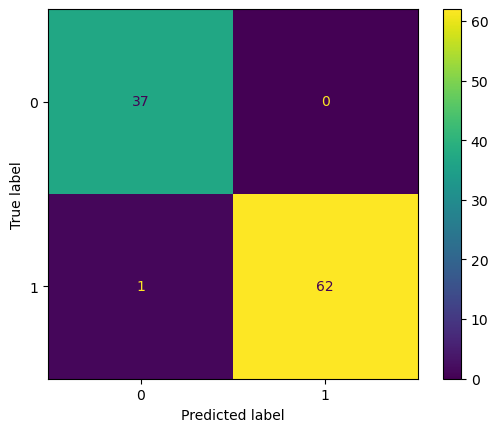

In [36]:
ConfusionMatrixDisplay.from_estimator(best_logreg, X_test, y_test);

#### 15. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer:

In this hospital case, where we are predicting Chronic Kidney Disease (CKD), the main focus is on correctly identifying patients with CKD (sensitivity). Missing a CKD diagnosis could have serious health consequences, so it's important to prioritize sensitivity.

Maximizing specificity is also important here for the model to minimize false positives by identifying correctly the non-CKD patients; this is important to help avoiding unnecessary treatment or anxiety for patients who do not have CKD. 

In [49]:
confusionMatrix = confusion_matrix(y_test, test_preds)
true_positives = confusionMatrix[1][1]
false_negatives = confusionMatrix[1][0]
true_negatives = confusionMatrix[0][0]
false_positives = confusionMatrix[0][1]
sensitivity = (true_positives / (true_positives + false_negatives)) * 100
specificity = (true_negatives / (true_negatives + false_positives)) * 100
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 98.4126984126984
Specificity: 100.0


#### 16. How does your model perform for your chosen metric?

Answer:

The model performs well for the chosen metrics of sensitivity and specificity. It achieved a sensitivity of 98.41%, this means it correctly identified 98.41% of patients with CKD. 

The model have a specificity of 100%, this means that it correctly identified all non-CKD patients. These results means that the model is performing well in identifying correctly patients with CKD and avoiding false positives.

#### 17. Plot the ROC Curve.

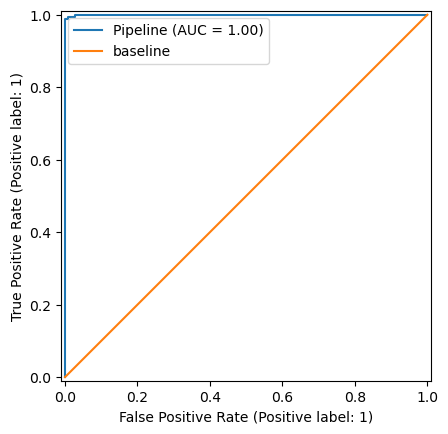

In [57]:
RocCurveDisplay.from_estimator(best_logreg, X_train, y_train)
plt.plot([0,1],[0,1], label='baseline')
plt.legend();

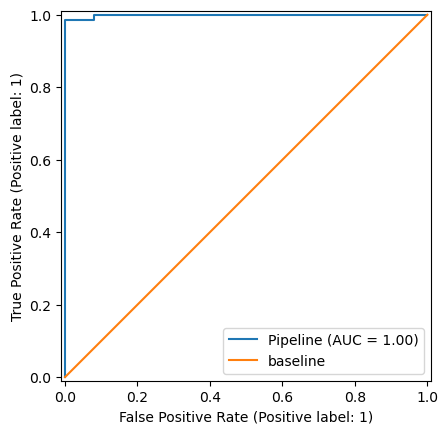

In [58]:
RocCurveDisplay.from_estimator(best_logreg, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline')
plt.legend();

#### 18. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

* Logistic regression helps us quickly understand relationships between different variables and how they influence what we're trying to predict. The results are easier to interpret
* Logistic regression avoids overfitting well, but for complex data we can add "regularization" to prevent it from overfitting.